# Generating SQL for SQLite using OpenAI, ChromaDB

This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-anthropic-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Anthropic</div>
        <small class="w-full">Use Anthropics Claude with your Anthropic API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-gemini-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Google Gemini</div>
        <small class="w-full">Use Google Gemini with your Gemini or Vertex API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-standard-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-openai-standard-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Qdrant</div>
        <small class="w-full">Use Qdrants open-source vector database</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>


## Setup


In [ ]:
%pip install 'vanna[chromadb,openai]'

In [1]:
from vanna.openai import OpenAI_Chat
from vanna.chromadb import ChromaDB_VectorStore

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()


class MyVanna(ChromaDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        OpenAI_Chat.__init__(self, config=config)


vn = MyVanna(config={'api_key': os.getenv(
    'OPENAI_API_KEY'), 'model': 'gpt-4o'})

<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../postgres-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Postgres</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">MySQL</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../duckdb-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> SQLite</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../oracle-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Oracle</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../other-database-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>


In [5]:
vn.connect_to_sqlite('./Bahrain_2023_Q.db')

## Training

You only need to train once. Do not train again unless you want to add more training data.


In [6]:

df_ddl = vn.run_sql(
    "SELECT type, sql FROM sqlite_master WHERE sql is not null")

print(df_ddl)
print('-'*100)

for ddl in df_ddl['sql'].to_list():
    print(ddl)
    print('-'*100)
    vn.train(ddl=ddl)

     type                                                sql
0   table  CREATE TABLE Drivers (\n                driver...
1   table  CREATE TABLE Tracks (\n                track_i...
2   table  CREATE TABLE Event (\n                event_id...
3   table  CREATE TABLE Sessions (\n                sessi...
4   table  CREATE TABLE Weather (\n                weathe...
5   table  CREATE TABLE Laps (\n                lap_id IN...
6   table  CREATE TABLE Telemetry (\n                tele...
7   index  CREATE INDEX idx_laps_driver_name ON Laps(driv...
8   index  CREATE INDEX idx_laps_session_id ON Laps(sessi...
9   index  CREATE INDEX idx_telemetry_lap_id ON Telemetry...
10  index  CREATE INDEX idx_telemetry_datetime ON Telemet...
11  index  CREATE INDEX idx_weather_session_id ON Weather...
12  index  CREATE INDEX idx_weather_datetime ON Weather(d...
13  index   CREATE INDEX idx_event_date ON Event(event_date)
14   view  CREATE VIEW DriverPerformanceSummaryWithWeathe...
15   view  CREATE VIEW T

/Users/diegomaradona/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:05<00:00, 15.4MiB/s]


CREATE TABLE Tracks (
                track_id INTEGER PRIMARY KEY,
                track_name TEXT NOT NULL,
                country TEXT NOT NULL
            )
----------------------------------------------------------------------------------------------------
Adding ddl: CREATE TABLE Tracks (
                track_id INTEGER PRIMARY KEY,
                track_name TEXT NOT NULL,
                country TEXT NOT NULL
            )
CREATE TABLE Event (
                event_id INTEGER PRIMARY KEY,
                round_number INTEGER,
                country TEXT,
                location TEXT,
                event_date DATE,
                event_name TEXT,
                session_1_date_utc DATETIME,
                session_1_name TEXT,
                session_2_date_utc DATETIME,
                session_2_name TEXT,
                session_3_date_utc DATETIME,
                session_3_name TEXT,
                session_4_date_utc DATETIME,
                session_4_name TEXT,
   

In [8]:

# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
            CREATE VIEW IF NOT EXISTS DriverPerformanceSummaryWithWeather AS
            SELECT 
                l.driver_name,
                e.event_name,
                s.session_type,
                t.track_name,
                COUNT(l.lap_id) AS total_laps,
                AVG(l.lap_time_in_seconds) AS avg_lap_time,
                MIN(l.lap_time_in_seconds) AS best_lap_time,
                AVG(l.sector_1_time_in_seconds) AS avg_sector1_time,
                AVG(l.sector_2_time_in_seconds) AS avg_sector2_time,
                AVG(l.sector_3_time_in_seconds) AS avg_sector3_time,
                AVG(l.finish_line_speed_trap_in_km) AS avg_finish_line_speed,
                COUNT(CASE WHEN l.is_personal_best THEN 1 END) AS personal_best_laps,
                AVG(w.air_temperature_in_celsius) AS avg_air_temp,
                AVG(w.track_temperature_in_celsius) AS avg_track_temp,
                SUM(CASE WHEN w.is_raining THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS rain_percentage
            FROM Laps l
            JOIN Sessions s ON l.session_id = s.session_id
            JOIN Tracks t ON s.track_id = t.track_id
            JOIN Event e ON s.event_id = e.event_id
            LEFT JOIN Weather w ON s.session_id = w.session_id 
                AND l.lap_start_time_in_datetime BETWEEN w.datetime AND datetime(w.datetime, '+1 minutes')
            GROUP BY l.driver_name, e.event_id, s.session_id;
""")

# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
vn.train(sql="SELECT * FROM my-table WHERE name = 'John Doe'")

Adding ddl: 
    CREATE VIEW IF NOT EXISTS DriverPerformanceSummaryWithWeather AS
            SELECT 
                l.driver_name,
                e.event_name,
                s.session_type,
                t.track_name,
                COUNT(l.lap_id) AS total_laps,
                AVG(l.lap_time_in_seconds) AS avg_lap_time,
                MIN(l.lap_time_in_seconds) AS best_lap_time,
                AVG(l.sector_1_time_in_seconds) AS avg_sector1_time,
                AVG(l.sector_2_time_in_seconds) AS avg_sector2_time,
                AVG(l.sector_3_time_in_seconds) AS avg_sector3_time,
                AVG(l.finish_line_speed_trap_in_km) AS avg_finish_line_speed,
                COUNT(CASE WHEN l.is_personal_best THEN 1 END) AS personal_best_laps,
                AVG(w.air_temperature_in_celsius) AS avg_air_temp,
                AVG(w.track_temperature_in_celsius) AS avg_track_temp,
                SUM(CASE WHEN w.is_raining THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS rain_percentag

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Question generated with sql: What are the details for the person named John Doe? 
Adding SQL...


'4dfd73a9-4462-5a23-8b28-b9d5c7125b49-sql'

In [9]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,4dfd73a9-4462-5a23-8b28-b9d5c7125b49-sql,What are the details for the person named John...,SELECT * FROM my-table WHERE name = 'John Doe',sql
0,6493e730-8fd5-5c9b-ba80-d991dcf0c4e9-ddl,None,CREATE TABLE Drivers (\n driver...,ddl
1,894692ac-1600-54b6-af13-4a9ff62c6e32-ddl,None,CREATE TABLE Tracks (\n track_i...,ddl
2,7258dd79-d9f7-5a33-86c9-c8cfe10e7967-ddl,None,CREATE TABLE Event (\n event_id...,ddl
3,64a28e8b-3faf-5ea0-8867-3e1e92958607-ddl,None,CREATE TABLE Sessions (\n sessi...,ddl
4,feb0cd7c-e372-50a8-a10a-736c42386360-ddl,None,CREATE TABLE Weather (\n weathe...,ddl
5,0f9d7dec-f228-53a0-879b-26a7918f177b-ddl,None,CREATE TABLE Laps (\n lap_id IN...,ddl
6,ae41976c-72dd-549c-a4d5-327db48beadb-ddl,None,CREATE TABLE Telemetry (\n tele...,ddl
7,bb13e8f0-6934-52fd-bbb6-62ab4a40b8b0-ddl,None,CREATE INDEX idx_laps_driver_name ON Laps(driv...,ddl
8,d0efbc31-d1e0-54f0-a19c-5905d905d9d3-ddl,None,CREATE INDEX idx_laps_session_id ON Laps(sessi...,ddl


In [10]:
# You can remove training data if there's obsolete/incorrect information.
vn.remove_training_data(id='51cf1d6d-7637-5b87-b9e7-31c577fbde59-doc')

True

In [12]:
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,4dfd73a9-4462-5a23-8b28-b9d5c7125b49-sql,What are the details for the person named John...,SELECT * FROM my-table WHERE name = 'John Doe',sql
0,6493e730-8fd5-5c9b-ba80-d991dcf0c4e9-ddl,None,CREATE TABLE Drivers (\n driver...,ddl
1,894692ac-1600-54b6-af13-4a9ff62c6e32-ddl,None,CREATE TABLE Tracks (\n track_i...,ddl
2,7258dd79-d9f7-5a33-86c9-c8cfe10e7967-ddl,None,CREATE TABLE Event (\n event_id...,ddl
3,64a28e8b-3faf-5ea0-8867-3e1e92958607-ddl,None,CREATE TABLE Sessions (\n sessi...,ddl
4,feb0cd7c-e372-50a8-a10a-736c42386360-ddl,None,CREATE TABLE Weather (\n weathe...,ddl
5,0f9d7dec-f228-53a0-879b-26a7918f177b-ddl,None,CREATE TABLE Laps (\n lap_id IN...,ddl
6,ae41976c-72dd-549c-a4d5-327db48beadb-ddl,None,CREATE TABLE Telemetry (\n tele...,ddl
7,bb13e8f0-6934-52fd-bbb6-62ab4a40b8b0-ddl,None,CREATE INDEX idx_laps_driver_name ON Laps(driv...,ddl
8,d0efbc31-d1e0-54f0-a19c-5905d905d9d3-ddl,None,CREATE INDEX idx_laps_session_id ON Laps(sessi...,ddl


## Asking the AI

Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.


Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Drivers (\n                driver_id INTEGER PRIMARY KEY,\n                driver_name TEXT NOT NULL,\n                team TEXT NOT NULL\n            )\n\nCREATE VIEW DriverPerformanceSummaryWithWeather AS\n            SELECT \n                l.driver_name,\n                e.event_name,\n                s.session_type,\n                t.track_name,\n                COUNT(l.lap_id) AS total_laps,\n                AVG(l.lap_time_in_seconds) AS avg_lap_time,\n                MIN(l.lap_time_in_seconds) AS best_lap_time,\n                AVG(l.sector_1_time_in_seconds) AS avg_sector1_time,\n                AVG(l.sector_2_time_in_seconds) AS avg_sector2_time,\n                AVG(l.sector_3_time_in_seconds) AS avg_sector

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


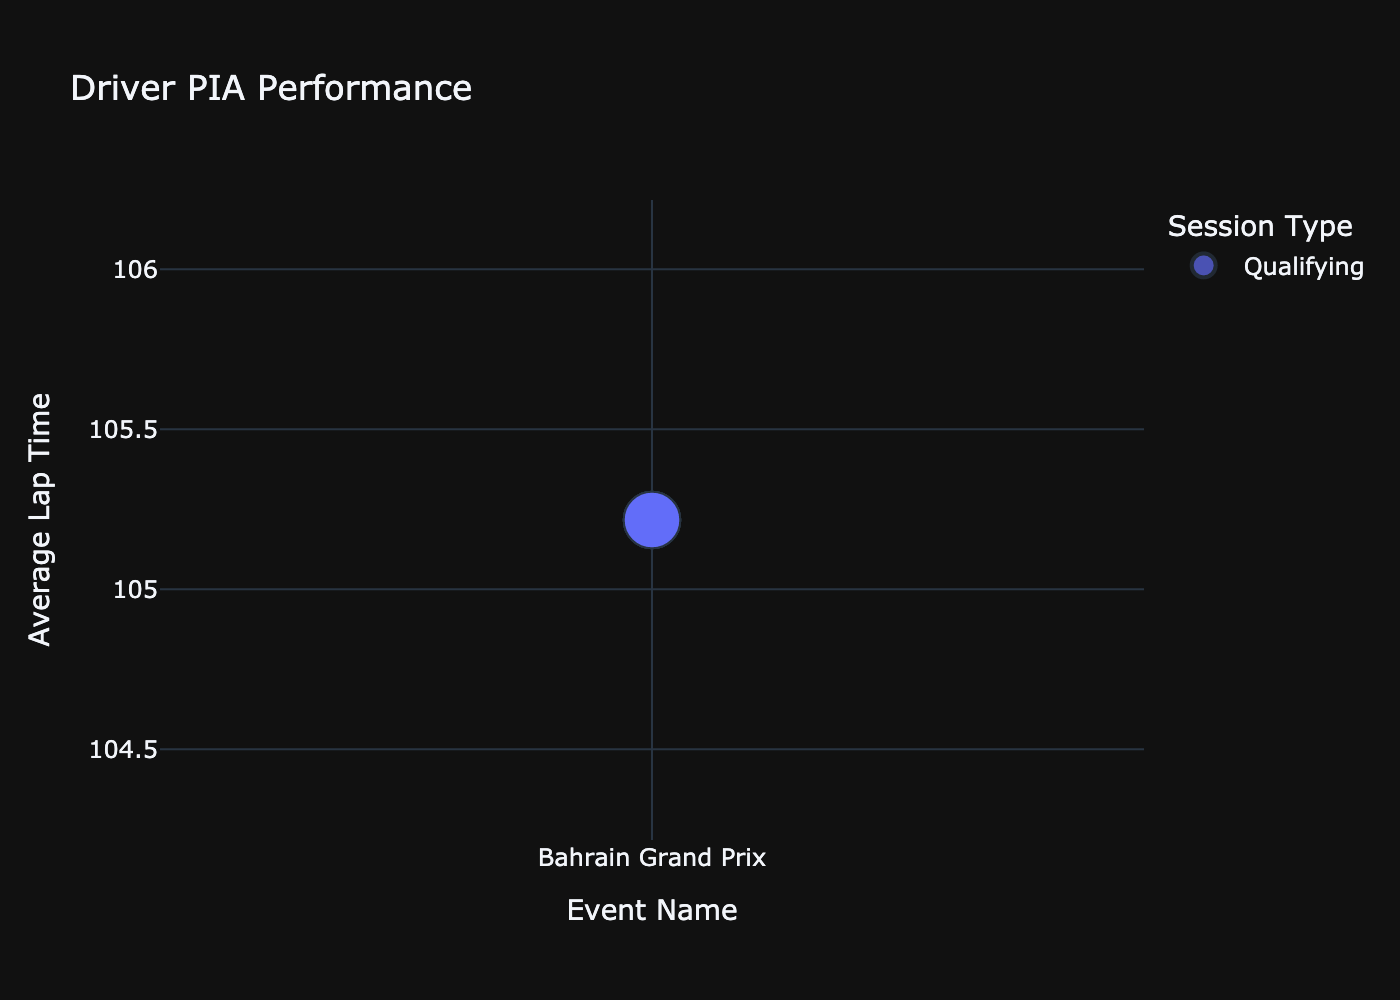

("SELECT * \nFROM DriverPerformanceSummaryWithWeather\nWHERE driver_name = 'PIA'\n",
   driver_name          event_name session_type track_name  total_laps  \
 0         PIA  Bahrain Grand Prix   Qualifying     Sakhir           7   
 1         PIA  Bahrain Grand Prix   Qualifying     Sakhir           7   
 2         PIA  Bahrain Grand Prix   Qualifying     Sakhir           7   
 3         PIA  Bahrain Grand Prix   Qualifying     Sakhir           7   
 4         PIA  Bahrain Grand Prix   Qualifying     Sakhir           7   
 5         PIA  Bahrain Grand Prix   Qualifying     Sakhir           7   
 
    avg_lap_time  best_lap_time  avg_sector1_time  avg_sector2_time  \
 0     105.21625         92.101          33.27225            46.283   
 1     105.21625         92.101          33.27225            46.283   
 2     105.21625         92.101          33.27225            46.283   
 3     105.21625         92.101          33.27225            46.283   
 4     105.21625         92.101         

In [13]:
vn.ask(question="How was the performance of the driver PIA?")

## Launch the User Interface

![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)


In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

## Next Steps

Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the

- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
